<a href="https://colab.research.google.com/github/Fragoa/SE3-deep-learning/blob/main/LearningRateScheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
from keras.datasets import mnist
from sklearn.manifold import TSNE

**Time-based decay**

In [9]:
def lr_time_based_decay(epoch, lr0=0.05, n_epochs=50):

  return lr0 / (1 + epoch * (lr0 / n_epochs))

In [5]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates = [lr_time_based_decay(epoch, initial_learning_rate, total_epochs) for epoch in epochs]

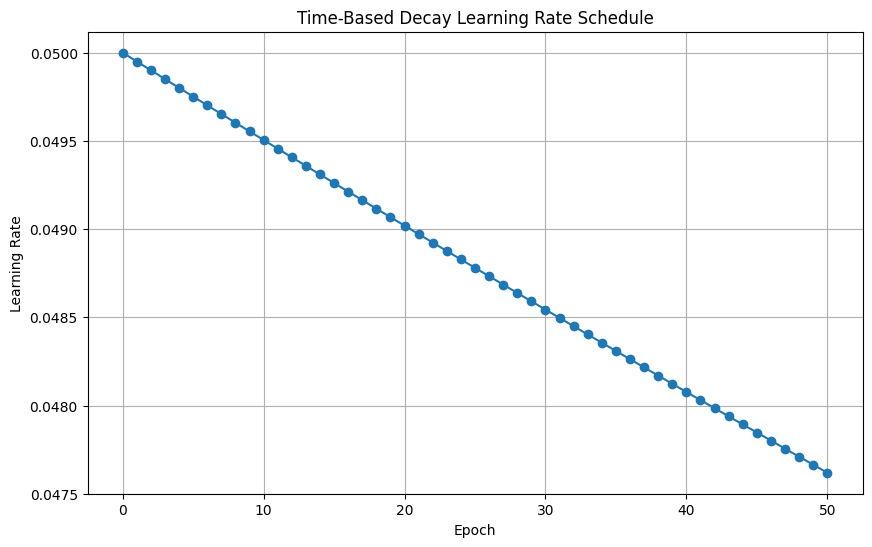

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, marker='o')
plt.title('Time-Based Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**Step Decay**

In [10]:
def lr_step_decay(epoch, initial_lr=0.05, step_size=10, gamma=0.5):

  drop = math.floor(epoch / step_size)
  return initial_lr * (gamma ** drop)

In [10]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates_step = [lr_step_decay(epoch, initial_learning_rate) for epoch in epochs]

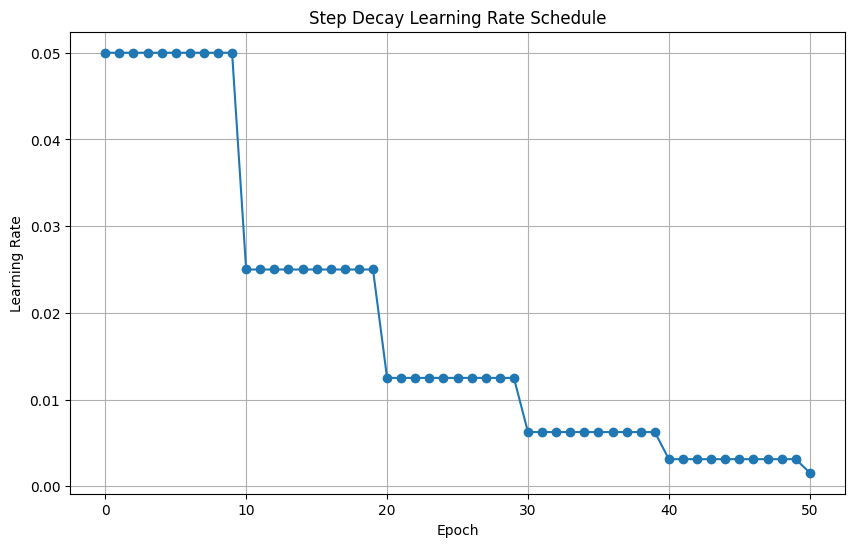

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates_step, marker='o')
plt.title('Step Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**Exponential decay**

In [11]:
def lr_exp_decay(epoch, initial_lr=0.05, decay_rate=0.05):

  return initial_lr * math.exp(-decay_rate * epoch)

In [7]:
initial_learning_rate = 0.05
total_epochs = 50
epochs = np.arange(0, total_epochs + 1)
learning_rates_exp = [lr_exp_decay(epoch, initial_learning_rate) for epoch in epochs]

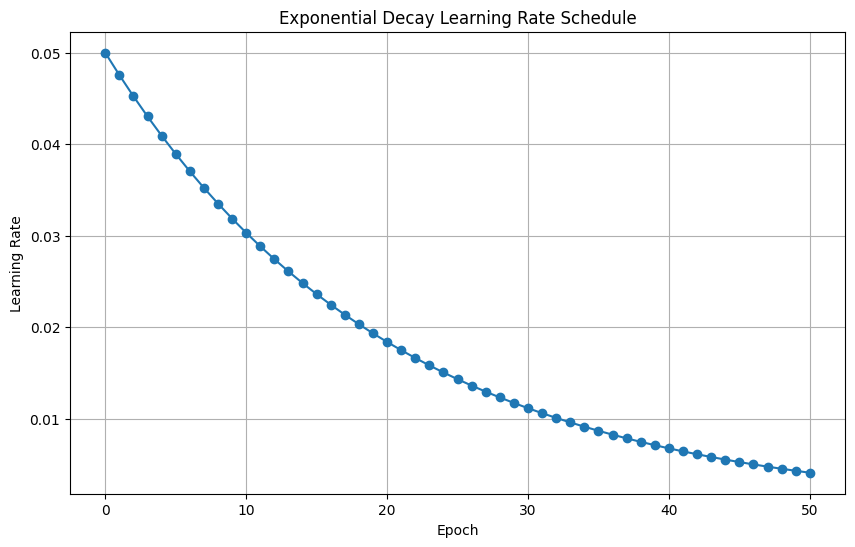

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates_exp, marker='o')
plt.title('Exponential Decay Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.show()

**load Dataset**

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


In [14]:
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        layers.Flatten(),
        layers.Dense(121, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
    return model

Running t-SNE... (This may take a few minutes)
t-SNE completed in 19.90 seconds


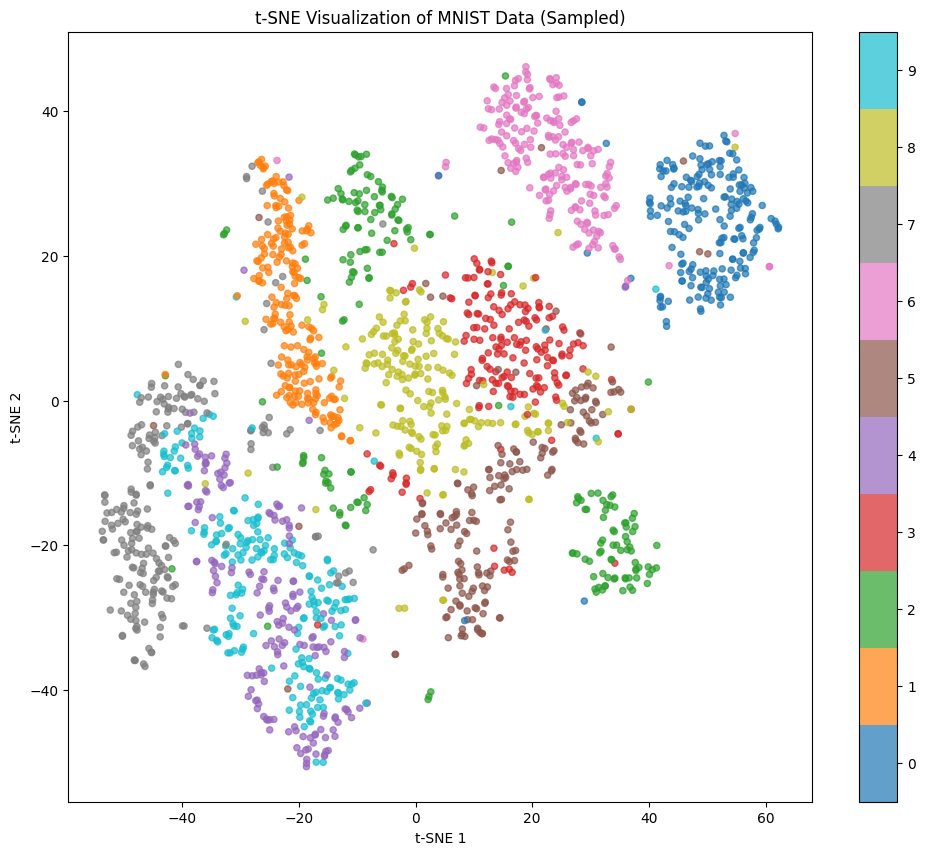

In [18]:
(x_train, y_train), (_, _) = mnist.load_data()

x_train = x_train.reshape(-1, 28*28) / 255.0
y_train = np.argmax(y_train, axis=1) if y_train.ndim > 1 else y_train

np.random.seed(42)
sample_idx = np.random.choice(len(x_train), 2000, replace=False)
x_sample = x_train[sample_idx]
y_sample = y_train[sample_idx]

print("Running t-SNE... (This may take a few minutes)")
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
x_tsne = tsne.fit_transform(x_sample)

print(f"t-SNE completed in {time.time()-start_time:.2f} seconds")

plt.figure(figsize=(12, 10))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_sample, alpha=0.7,
                     cmap='tab10', s=20)
plt.colorbar(scatter, ticks=range(10)), plt.clim(-0.5, 9.5)
plt.title('t-SNE Visualization of MNIST Data (Sampled)')
plt.xlabel('t-SNE 1'), plt.ylabel('t-SNE 2')
plt.show()

**Train Model with Time-based Decay**

In [24]:
initial_learning_rates = [0.001, 0.01, 0.1]
histories = {}

epochs = 50
batch_size = 32
decay_rate = 0.001

In [27]:
model_time_based = create_model()

optimizer_time_based = keras.optimizers.Adam(learning_rate=0.01)

model_time_based.compile(optimizer=optimizer_time_based,
                         loss="categorical_crossentropy",
                         metrics=["accuracy"])

lr_callback_time_based = keras.callbacks.LearningRateScheduler(lr_time_based_decay)

history_time_based = model_time_based.fit(x_train, y_train,
                                          epochs=50,
                                          batch_size=32,
                                          validation_data=(x_test, y_test),
                                          callbacks=[lr_callback_time_based],
                                          verbose=0)

**Train Model with Step Decay**

In [28]:
model_step = create_model()

optimizer_step = keras.optimizers.Adam(learning_rate=0.01)

model_step.compile(optimizer=optimizer_step,
                    loss="categorical_crossentropy",
                    metrics=["accuracy"])

lr_callback_step = keras.callbacks.LearningRateScheduler(lr_step_decay)

history_step = model_step.fit(x_train, y_train,
                               epochs=50,
                               batch_size=32,
                               validation_data=(x_test, y_test),
                               callbacks=[lr_callback_step],
                               verbose=0)

**Train Model with Exponential Decay**

In [29]:
model_exp = create_model()

optimizer_exp = keras.optimizers.Adam(learning_rate=0.01)

model_exp.compile(optimizer=optimizer_exp,
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

lr_callback_exp = keras.callbacks.LearningRateScheduler(lr_exp_decay)

history_exp = model_exp.fit(x_train, y_train,
                              epochs=50,
                              batch_size=32,
                              validation_data=(x_test, y_test),
                              callbacks=[lr_callback_exp],
                              verbose=0)

**Train Model with constant learning rate**

In [30]:
model_constant = create_model()
optimizer_constant = keras.optimizers.Adam(learning_rate=0.01)
model_constant.compile(optimizer=optimizer_constant,
                        loss="categorical_crossentropy",
                        metrics=["accuracy"])
history_constant = model_constant.fit(x_train, y_train,
                                       epochs=50,
                                       batch_size=32,
                                       validation_data=(x_test, y_test),
                                       verbose=0)

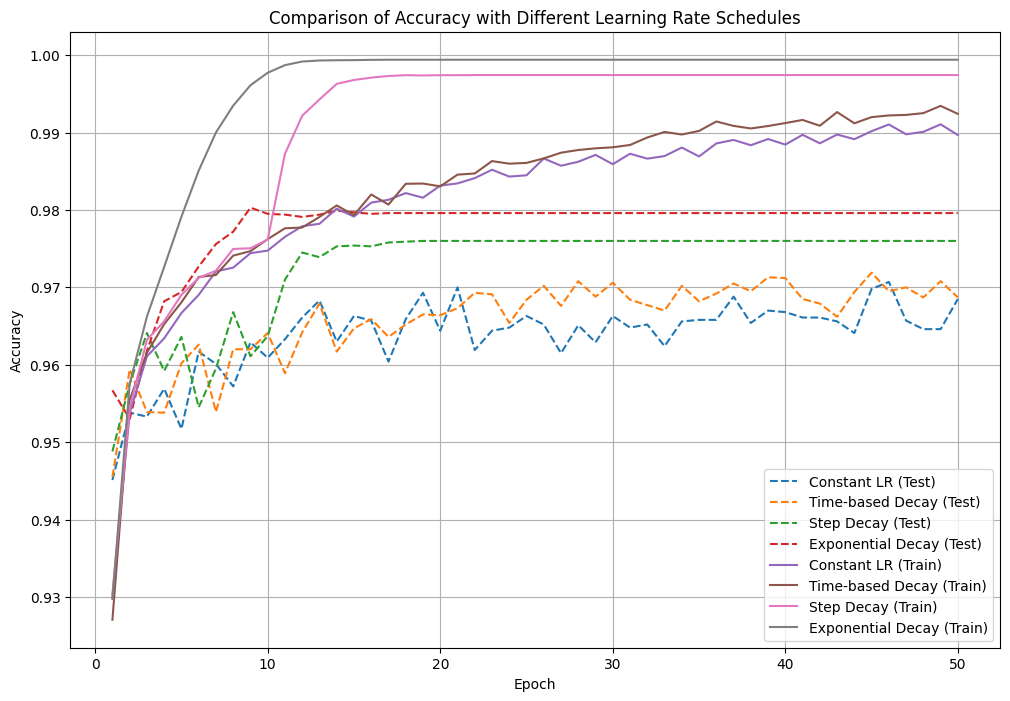

In [31]:
acc_time_based_train = history_time_based.history['accuracy']
acc_time_based_test = history_time_based.history['val_accuracy']

acc_step_train = history_step.history['accuracy']
acc_step_test = history_step.history['val_accuracy']

acc_exp_train = history_exp.history['accuracy']
acc_exp_test = history_exp.history['val_accuracy']

acc_constant_train = history_constant.history['accuracy']
acc_constant_test = history_constant.history['val_accuracy']

epochs_range = range(1, len(history_time_based.history['accuracy']) + 1)

plt.figure(figsize=(12, 8))

plt.plot(epochs_range, acc_constant_test, label='Constant LR (Test)', linestyle='--')
plt.plot(epochs_range, acc_time_based_test, label='Time-based Decay (Test)', linestyle='--')
plt.plot(epochs_range, acc_step_test, label='Step Decay (Test)', linestyle='--')
plt.plot(epochs_range, acc_exp_test, label='Exponential Decay (Test)', linestyle='--')

plt.plot(epochs_range, acc_constant_train, label='Constant LR (Train)')
plt.plot(epochs_range, acc_time_based_train, label='Time-based Decay (Train)')
plt.plot(epochs_range, acc_step_train, label='Step Decay (Train)')
plt.plot(epochs_range, acc_exp_train, label='Exponential Decay (Train)')

plt.title('Comparison of Accuracy with Different Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()